In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
import statsmodels.stats.diagnostic

In [92]:
all_data = pd.read_csv('./data/2021MCMProblemC_DataSet.csv', encoding='utf-8', index_col='Detection Date')
# all_data
## for the first question, only keep track of the sightings in 2019 and 2020
all_data.index = pd.to_datetime(all_data.index, errors='coerce')
all_data = all_data.sort_values(by = 'Detection Date', ascending=True)
data = all_data[(all_data.index >= "2019/1/1")]
train_data = data[0:4000]
test_data = data[4001:]
train_data
test_data


,GlobalID,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
Detection Date,,,,,,,
2020-09-16,{0F1CDC55-1987-49FF-B3A6-EE8B30E02494},Unsure if it’s indeed an Asian hornet but it’s...,Negative ID,Thanks for the submission. That is a wood wasp.,2020/9/16,48.099140,-123.435330
2020-09-16,{4B5B5098-01C3-4B8A-ADD4-ABE24FE1AD5F},burrowing in sand/dirt cracks of curb of sidew...,Negative ID,Thanks for the submission. That is the great g...,2020/9/16,47.859928,-121.826303
2020-09-16,{C898F05D-6BDB-40E2-929D-C44380DA4409},,Negative ID,Thanks for the submission. That is the great g...,2020/9/16,47.865911,-121.986893
2020-09-16,{C19D5FE3-4165-417F-B552-48008F1FA9A3},,Negative ID,Thanks for the submission. That cutie is a ten...,2020/9/16,47.120218,-122.190379
2020-09-16,{FFD85AC0-D1D1-4CB6-BDD4-982A1E341D4A},I think this was most probably a Great Golden ...,Unverified,,2020/9/16,48.853501,-122.613918
...,...,...,...,...,...,...,...
2020-10-23,{46B8640F-7273-4517-AAD4-10D6CE6385F8},I did not get a picture it flew into the garag...,Unprocessed,,2020/10/23,47.144470,-122.164895
2020-10-28,{390FCB4C-2CED-49D6-81A4-73DFB8267C00},On a walk we observed a large hornet. It struc...,Unverified,,2020/10/3,47.343386,-122.166631
2020-11-20,{A20C88C4-CCFC-46F5-B454-FAA778DABA55},It was in my house. I trapped it against a wi...,Negative ID,That is a bald faced hornet.,2020/6/12,48.773710,-122.360487


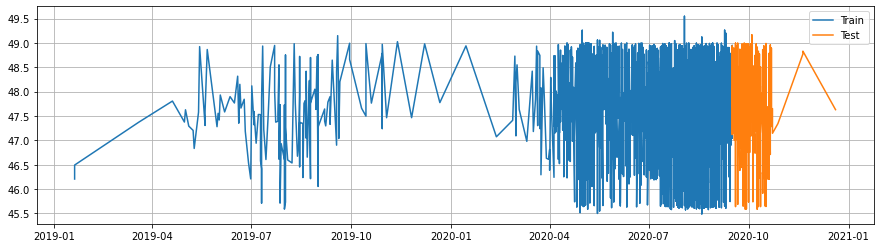

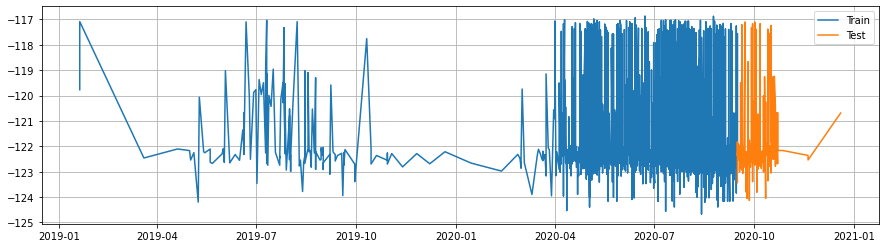

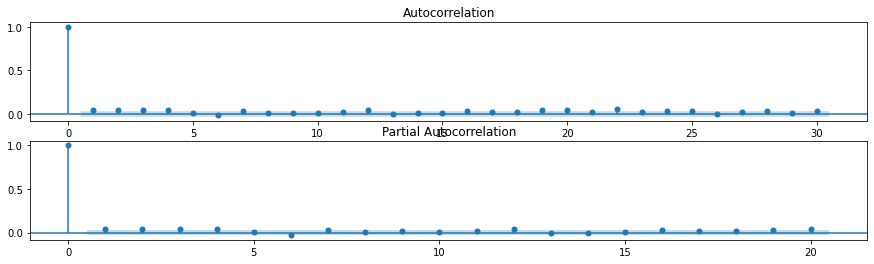

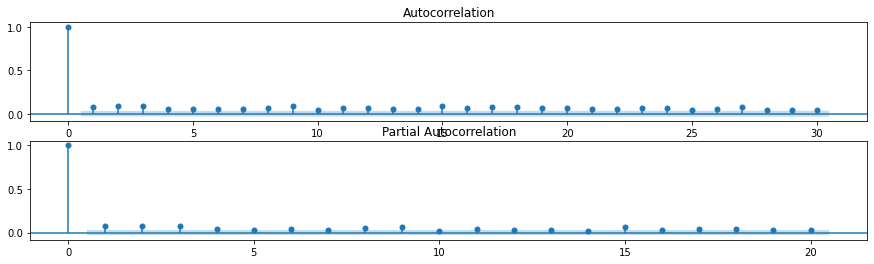

ADF test statistic: -10.044473677103694
p-value: 1.4667730756264333e-17
ADF test statistic: -7.60509860468732
p-value: 2.3335848164183497e-11

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5106  , p=0.0610  , df_denom=4364, df_num=1
ssr based chi2 test:   chi2=3.5130  , p=0.0609  , df=1
likelihood ratio test: chi2=3.5116  , p=0.0609  , df=1
parameter F test:         F=3.5106  , p=0.0610  , df_denom=4364, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0551  , p=0.1282  , df_denom=4361, df_num=2
ssr based chi2 test:   chi2=4.1148  , p=0.1278  , df=2
likelihood ratio test: chi2=4.1129  , p=0.1279  , df=2
parameter F test:         F=2.0551  , p=0.1282  , df_denom=4361, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5200  , p=0.0562  , df_denom=4358, df_num=3
ssr based chi2 test:   chi2=7.5721  , p=0.0557  , df=3
likelihood ratio test: chi2=7.5655  , p=0.0559  , df=3
parameter F test:   

{1: ({'ssr_ftest': (3.510566845806171, 0.06104536570279433, 4364.0, 1),
   'ssr_chi2test': (3.5129801594031966, 0.060889834645595144, 1),
   'lrtest': (3.5115679295868176, 0.06094175535806107, 1),
   'params_ftest': (3.5105668458036505, 0.06104536570288156, 4364.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.0550560100908988, 0.12820968341036706, 4361.0, 2),
   'ssr_chi2test': (4.114824370583291, 0.12778422428703606, 2),
   'lrtest': (4.112886538625389, 0.12790809646498097, 2),
   'params_ftest': (2.055056010090754, 0.12820968341040584, 4361.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.5199760191341465, 0.056180929637345785, 4358.0, 3),
   'ssr_chi2test': (7.572071126792486, 0.05573526854190268, 3),
   'lrtest': (7.565510984879438, 0.05589887280011435, 3),
   'params_ftest': (2.519976019133512, 0.056180929637380264, 4358.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
         

In [116]:
## data is the data we will use for the pridiction
plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Latitude'], label='Train')
plt.plot(test_data['Latitude'], label='Test')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Longitude'], label='Train')
plt.plot(test_data['Longitude'], label='Test')
plt.legend(loc='best')
plt.show()

## stationarity test
f = plt.figure(facecolor="white", figsize=(15, 4))
f1 = f.add_subplot(211)
plot_acf(train_data['Latitude'], lags=30, ax = f1)
f2 = f.add_subplot(212)
plot_pacf(train_data['Latitude'], lags=20, ax =f2)
plt.show()

f = plt.figure(facecolor="white", figsize=(15, 4))
f1 = f.add_subplot(211)
plot_acf(train_data['Longitude'], lags=30, ax = f1)
f2 = f.add_subplot(212)
plot_pacf(train_data['Longitude'], lags=20, ax =f2)
plt.show()

## ADF test
## null hypothesis: series is not stationary
adfuller_test = adfuller(data['Latitude'], autolag="AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(data['Longitude'], autolag="AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

## Granger causality test
## null hypothesis: Longitude has no impact on Latitude
grangercausalitytests(data[['Latitude','Longitude']], maxlag=5)



+ It can be seen that both the 0-order autocorrelation coefficient and the 0-order partial autocorrelation coefficient are constant at 1.In the following two figures, the autocorrelation coefficient and partial autocorrelation coefficient rapidly decrease from 1 to near 0, and then fluctuate slightly around the 0 axis with the rise of the order, which basically meets the requirements of stationarity
+ from the adfuller test we can also find out the p-value is much smaller that 1% so that we reject the null hypothesis which means the two variables basically meets the requirements of stationarity
+ also from the grangercausalitytests, p-value at lag = 4 < 0.05 reject null hypothesis, using Longitude to predict Latitude is helpful


E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


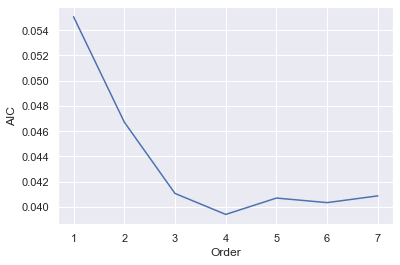

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Feb, 2021
Time:                     17:00:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  0.0677507
Nobs:                     3996.00    HQIC:                 0.0494524
Log likelihood:          -11400.9    FPE:                    1.04019
AIC:                    0.0394036    Det(Omega_mle):         1.03552
--------------------------------------------------------------------
Results for equation Latitude
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               35.049722         1.962666           17.858           0.000
L1.Latitude          0.034860         0.016020            2.176           0.030
L1.Longitude        -0.007423         0.007773           -0.9

In [136]:
train_data = pd.DataFrame(train_data, columns = ['Latitude', 'Longitude'])
## model
forecasting_model = VAR(train_data)
results_aic = []
for p in range(1,8):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)
import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,8,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

results = forecasting_model.fit(4)
results.summary()

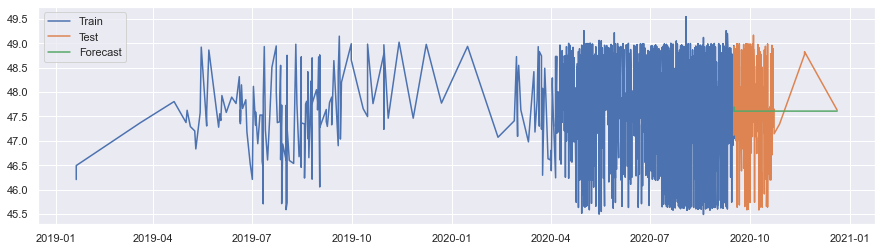

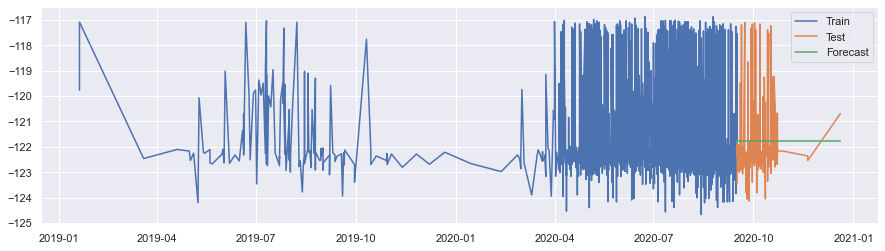

In [147]:
laaged_values = train_data.values[-4:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=367), columns= ['Latitude', 'Longitude'], index = test_data.index)
#forecast


plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Latitude'], label='Train')
plt.plot(test_data['Latitude'], label='Test')
plt.plot(forecast['Latitude'], label='Forecast')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Longitude'], label='Train')
plt.plot(test_data['Longitude'], label='Test')
plt.plot(forecast['Longitude'], label='Forecast')

plt.legend(loc='best')
plt.show()
